In [1]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(string, list_dir = '../DanielCorley/user-site-export'):
    
    '''
    pass in the first three letters of the file you're trying to load:
        ['ste', 'dis', 'hea', 'ste', 'est']
    '''
    file_dict = {
        'ste': 'step_df',
        'dis': 'dist_df',
        'hea': 'heart_df',
        'sle': 'sleep_df',
        'est': 'oxy_df'
    }
    if string not in file_dict:
        raise Exception('string not recognized!')
    
    try:
        df = pd.read_pickle(file_dict[string])
        print('loading from pickle')
        return df
    except IOError:
        print('loading from file storage')
        files = [x for x in os.listdir(list_dir) if x[:3] == string]
        print(f'example file name: {files[0]}')
        print(f'number of files: {len(files)}')
        
        file_type = None
        try:
            pd.read_json(f'{list_dir}/{files[0]}')
            file_type = 'json'
            print('loading json')
        except:
            file_type = 'csv'
            print('loading csv')
            
        # iterate over the files and append to one dataframe
        df = pd.DataFrame()
        for i,file in enumerate(files, 1):
            print(i, end=', ' if file != files[-1] else '\n')
            if file_type == 'json':
                df = df.append(pd.read_json(f'{list_dir}/{file}'))
            else:
                df = df.append(pd.read_csv(f'{list_dir}/{file}'))
        df.to_pickle(file_dict[string])
        return df
    finally:
        print('files done!')

# steps

In [3]:
step_df = load_data('ste')

loading from pickle
files done!


In [6]:
step_df = step_df.resample('d').sum().fillna(0)

In [8]:
step_df.to_pickle('step_df')

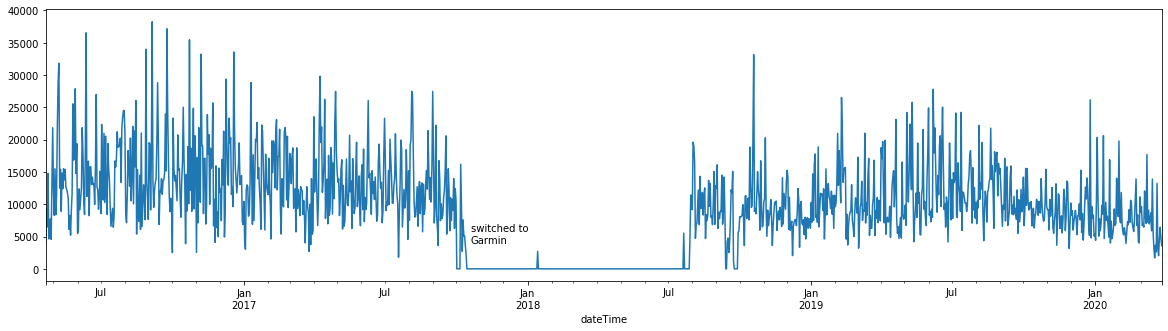

In [9]:
step_df['value'].plot(figsize=(20,5))
plt.text('2017-10-20', 4000, 'switched to\nGarmin');

# heart rate

In [107]:
heart_df = load_data('hea')

loading from pickle
files done!


In [108]:
%%time
heart_df['bpm'] = heart_df.value.map(lambda x: x['bpm'])
heart_df.drop(columns=['value'], inplace=True)

AttributeError: 'DataFrame' object has no attribute 'value'

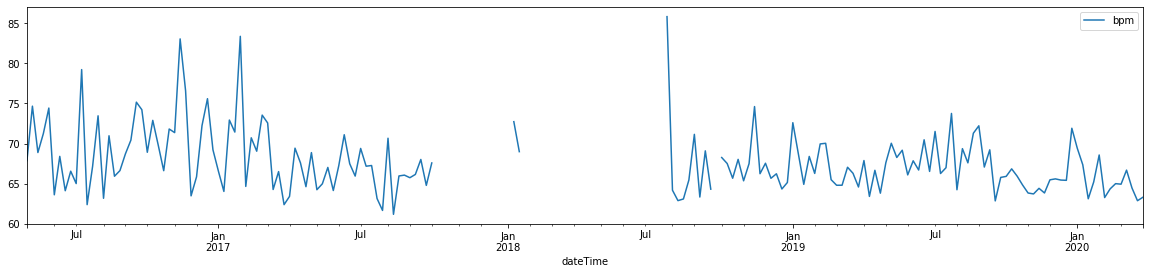

In [109]:
heart_df = heart_df.resample('d').mean()
heart_df.to_pickle('heart_df')

heart_df.resample('w').mean().plot(figsize=(20,4));

# distance

In [103]:
dist_df = load_data('dis')

dist_df = dist_df.resample('d').sum()

dist_df.to_pickle('dist_df')

loading from pickle
files done!


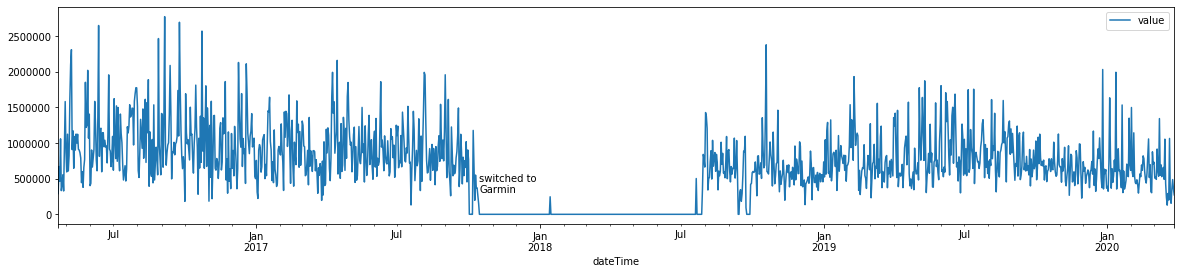

In [104]:
df_day = dist_df.resample('d').mean().fillna(0)
df_day.plot(figsize=(20,4))
plt.text('2017-10-15', 300000, 'switched to\nGarmin');

In [105]:
dist_df.to_csv('dist.csv')

# sleep

In [61]:
sleep_df = load_data('sle')

loading from pickle
files done!


In [62]:
sleep_df.dateOfSleep = pd.to_datetime(sleep_df['dateOfSleep'])

In [63]:
sleep_df.set_index('dateOfSleep', inplace=True)

In [64]:
sleep_df = sleep_df.drop(columns=[col for col in sleep_df.columns if col != 'minutesAsleep'])

In [65]:
sleep_df.index.is_monotonic_decreasing, sleep_df.index.is_monotonic_increasing

(False, False)

In [75]:
sleep_df[sleep_df.index.duplicated()].sort_index()

,minutesAsleep
dateOfSleep,


In [81]:
sleep_df = sleep_df.resample('d').mean()/60

In [76]:
sleep_df.index.is_monotonic_decreasing, sleep_df.index.is_monotonic_increasing

(False, True)

In [87]:
sleep_df.to_pickle('sleep_df')

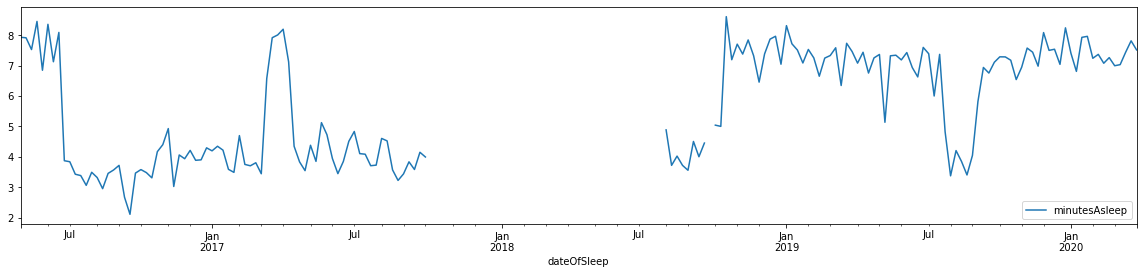

In [89]:
sleep_df.resample('w').mean().plot(figsize=(20,4));

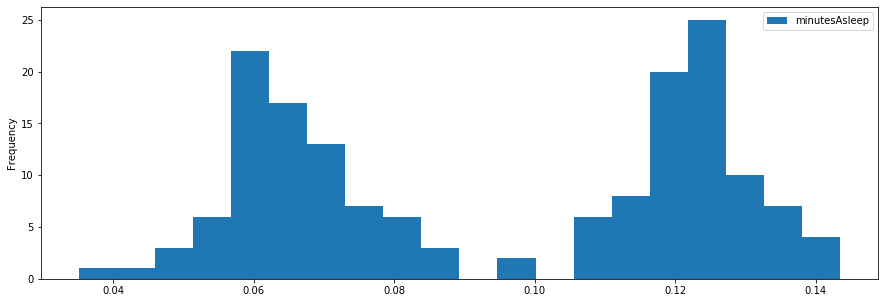

In [86]:
(sleep_df.resample('w').agg({'minutesAsleep':'mean'})/60).plot(kind='hist', bins=20, figsize=(15,5));

# Estimated Oxygen Variation

In [91]:
oxy_df = load_data('est')

loading from pickle
files done!


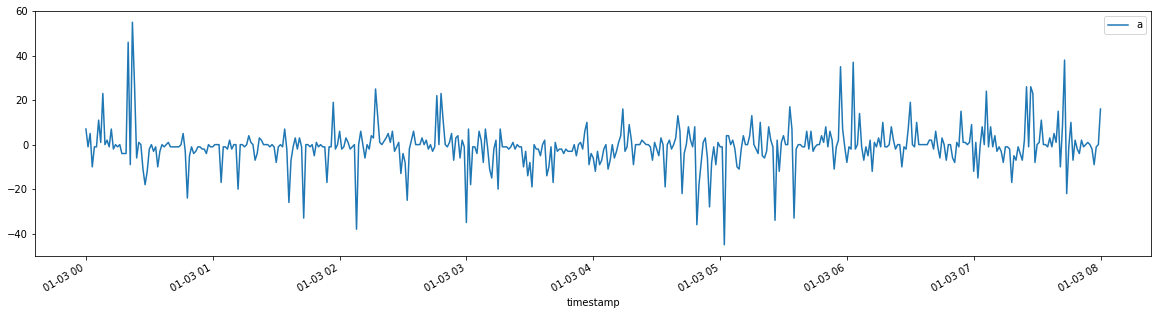

In [94]:
oxy_df.loc['2020-01-03'].plot(figsize=(20,5));

In [114]:
oxy_df.resample('d').mean().to_csv('oxy.csv')